<p style="font-size:200%;">Classification using both models on existing data and on new folders</p>

This notebook shows an example of how to classify new folders of pdfs with both the keyword and svm model.

It also shows how to classify the existing dataset (dataset 1 and dataset 2) using both techniques.

In [1]:
%load_ext autoreload
%autoreload 2

import src.classify_folder as classify_folder
from src.models.keyword_model import KeywordModel, KeywordPreprocessing
from src.utils.ml_utilities import print_metrics, plot_confusion_matrix
from src.utils.utilities import load_pickle

# Classification of new folders

In [2]:
sample_folder = 'data/sample_pdfs/'

## Keywords classifier

In [3]:
result_df = classify_folder.classify_folder_of_pdfs_with_keywords(sample_folder)
result_df.head()

## SVM classifier

In [4]:
svm_trained_model_path = 'data/models/trained_svm_model.p'

In [5]:
result_df = classify_folder.classify_folder_of_pdfs_with_svm(sample_folder, svm_trained_model_path)
result_df.head()

# Classification of existing dataset

## Secondary dataset

In [6]:
df2_path = 'data/data_preprocessed/clean_dataset2.p'

In [7]:
df2 = load_pickle(df2_path)
df2.head(1)

,filename,folder,text,y,labo,clean_text
0,0000.pdf,data/dataset2/,\n\n\n\n\n\n\n\n\n\n\nExample lab report\n\netc.,1,example_lab,example lab report etc


### Keywords classifier

Predicted positive: 947
Predicted negative: 1354
True positive: 708
False positive: 239
True negative: 1321
False negative: 33
Sensitivity=recall=vp/(vp+fn): 0.96
Specificity=vn/(vn+fp): 0.85
VPP=vp/(vp+fp): 0.75
VPN=vn/(vn+fn): 0.98
Confusion matrix, without normalization


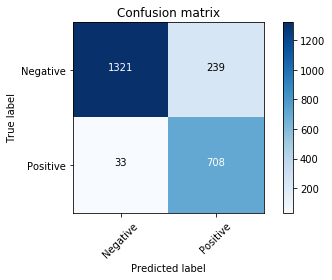

In [8]:
kw_model = KeywordModel(keyword_filename='data/keywords/terms_2016-2017.txt')
kw_preprocessing = KeywordPreprocessing()
df2['y_pred'] = kw_model.predict(kw_preprocessing.transform(df2.text.values))
print_metrics(df2.y.values, df2.y_pred.values)
plot_confusion_matrix(df2.y.values, df2.y_pred.values)

### SVM classifier

Note that model has overfitted on the dataset.

Predicted positive: 1022
Predicted negative: 1279
True positive: 739
False positive: 283
True negative: 1277
False negative: 2
Sensitivity=recall=vp/(vp+fn): 1.00
Specificity=vn/(vn+fp): 0.82
VPP=vp/(vp+fp): 0.72
VPN=vn/(vn+fn): 1.00
Confusion matrix, without normalization


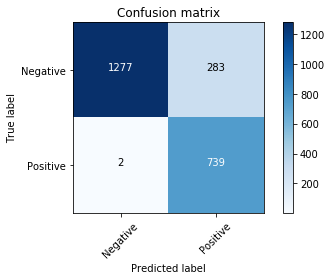

In [9]:
svm_model = load_pickle(svm_trained_model_path)
df2['y_pred'] = svm_model.predict(df2.clean_text.values)
print_metrics(df2.y.values, df2.y_pred.values)
plot_confusion_matrix(df2.y.values, df2.y_pred.values)

## Primary dataset

In [10]:
df1_path = 'data/data_preprocessed/clean_dataset1.p'
df1 = load_pickle(df1_path)

### Keywords classifier

Predicted positive: 25885
Predicted negative: 14717
True positive: 23610
False positive: 2275
True negative: 14326
False negative: 391
Sensitivity=recall=vp/(vp+fn): 0.98
Specificity=vn/(vn+fp): 0.86
VPP=vp/(vp+fp): 0.91
VPN=vn/(vn+fn): 0.97
Confusion matrix, without normalization


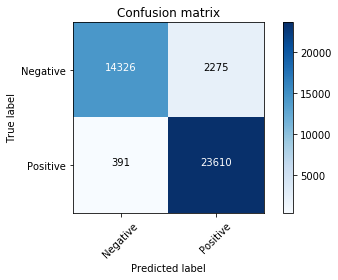

In [12]:
kw_model = KeywordModel(keyword_filename='data/keywords/terms_2016-2017.txt')
kw_preprocessing = KeywordPreprocessing()
df1['y_pred'] = kw_model.predict(kw_preprocessing.transform(df1.text.values))
print_metrics(df1.y.values, df1.y_pred.values)
plot_confusion_matrix(df1.y.values, df1.y_pred.values)

### SVM classifier

Note that model has overfitted on the dataset.

Predicted positive: 25443
Predicted negative: 15159
True positive: 23977
False positive: 1466
True negative: 15135
False negative: 24
Sensitivity=recall=vp/(vp+fn): 1.00
Specificity=vn/(vn+fp): 0.91
VPP=vp/(vp+fp): 0.94
VPN=vn/(vn+fn): 1.00
Confusion matrix, without normalization


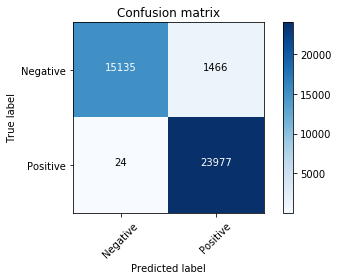

In [13]:
svm_model = load_pickle(svm_trained_model_path)
df1['y_pred'] = svm_model.predict(df1.clean_text.values)
print_metrics(df1.y.values, df1.y_pred.values)
plot_confusion_matrix(df1.y.values, df1.y_pred.values)